<a href="https://colab.research.google.com/github/findalexli/ML_algo_with_numpy/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np


(2, 150)


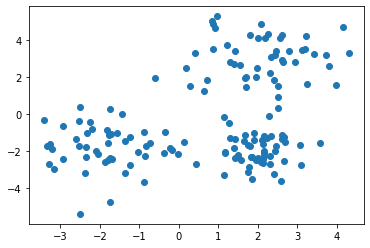

In [5]:
a = np.random.multivariate_normal([-2, -2], [[1.0, 0], [0, 1.0]], 50).T 
b = np.random.multivariate_normal([2, -2], [[0.5, 0], [0, 0.5]], 50).T 
c = np.random.multivariate_normal([2, 3], [[1.0, 0], [0, 1.5]], 50).T 
X = np.hstack((a, b, c)) 
print(X.shape)
plt.scatter(X[0], X[1]) 

K -means
Coordiante descent of 

$$ \sum_{i = 1^{n} || X^i - \mu ||^2 $$


1. Select number of cluster that we want as k 
2. Randomly choose k points in the data as centroids
3. Assign each data point to its nearest neighbor
4. Recompute the mean of data in each cluster as their new centroid
5. Repeat (3) and (4) until some stopping criteria (points do not change cluster)

Drawback: 
1.We have to pre-specify k before starting the algorithm and we might not know what is the best k
2. In k-means, the final clusters depend a lot on the initialization procedure
3. K-means performs poorly when the clusters are very complicated shapes

In [9]:
X.T.shape

(150, 2)

In [52]:
def l2_distance(u, v):
    return np.linalg.norm(u - v)

def _calc_closet_cluster(point, cluster_to_centroids):
    min_distance = float('inf')
    output = None
    for i, centroid in enumerate(cluster_to_centroids):
        if min_distance > l2_distance(point, centroid):
            min_distance = l2_distance(point, centroid)
            output = i 
    return output

def kmeans(X, k, max_iterations, points_change_min = 1e-9):
    # i for cluster index, and j for point index
    n = X.shape[0]
    centroids_id = np.random.randint(0, n, k)
    centroids = X[centroids_id]
    # points_to_cluster = np.ones(n)
    # cluster_to_points = [[] for _ in range(k)]
    for iter_idx in range(max_iterations):
        prev_centroids = centroids.copy()
        cluster_to_points = [[] for _ in range(k)]
        points_to_cluster = np.ones(n)
        for j in range(n):
            i = _calc_closet_cluster(X[j], centroids)
            points_to_cluster[j] = i
            cluster_to_points[i].append(j)
        for i in range(k):
            mean = np.mean(X[cluster_to_points[i]], axis = 0)
            centroids[i] = mean
        
        if np.linalg.norm(prev_centroids - centroids) < points_change_min:
            print('Early stopped')
            break
        
        if iter_idx % 50 == 0 or iter_idx == max_iterations - 1:
            distances_summed = 0
            for i in range(k):
                mean = centroids[i]
                distances_summed += np.sum(l2_distance(mean, point) for point in X[cluster_to_points[i]])
            print(f'Average distance { distances_summed}')
    return points_to_cluster, distances_summed


inertia_list = []
for k in range(3, 10):
    _, inertia = kmeans(X.T, k, 700)
    inertia_list.append(inertia)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Average distance 336.21730094333964
Early stopped
Average distance 378.2485716355961
Early stopped
Average distance 240.37090204827186
Early stopped
Average distance 164.71005816065752
Early stopped
Average distance 167.92905529733892
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 150.07375174388562
Average distance 161.42283730513827
Average distance 149.983129564348
Average distance 149.983129564348
Average distance 149.983129564348
Average distance 149.983129564348
Average distance 149.983129564348
Average distance 149.983129564348
Average distance 149.

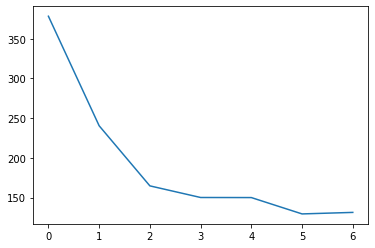

In [54]:
plt.plot(inertia_list)

Average distance 183.05410551266834
Early stopped


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


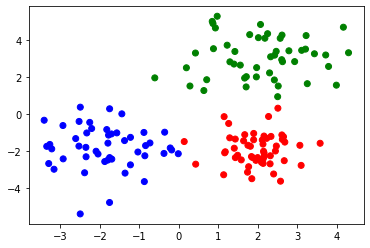

In [56]:
colormap = np.array(['r', 'g', 'b'])
points_to_cluster, _ = kmeans(X.T, 3, 700)

plt.scatter(X[0], X[1], c = colormap[points_to_cluster.astype(int)])

# Alternative method

In [39]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            # distances_summed = 0
            # for i in range(len(centroids)):
            #     mean = centroids[i]
            #     distances_summed += np.sum(np.linalg.norm(mean - point) for point in clusters[i])
            print(distances_summed)
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function

        return y_pred

Kmeans = KMeansClustering(X, 3)
y_pred = Kmeans.fit(X)

IndexError: ignored

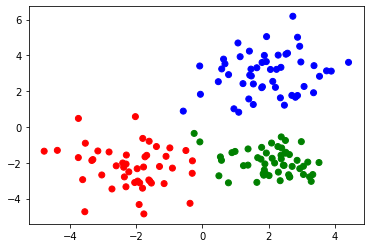

In [11]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X[0], X[1], c = colormap[points_to_cluster])